# 分析Z500上的消融实验

In [13]:
import sys
sys.path.append("../")
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from src.utils.plot import subplot_daloop
from src.utils.data_utils import NAME_TO_VAR

In [14]:
DALOOP_DIR = "../../output/ablation_study/ablation_study_z500"
ERA5_DIR = "../../data/era5"
VARIABLE = "geopotential"
LEVEL = 500
RESOLUTION = 5.625
methods = ["4dvarunet_woscale", "4dvarunet_wscale", "4dvargan_woscale", "4dvargan_wscale", "4dvarcyclegan_woscale", "4dvarcyclegan_wscale"]

In [15]:
gt = xr.open_mfdataset(f"{ERA5_DIR}/{VARIABLE}_{LEVEL}_{RESOLUTION}deg/test/*.nc", combine="by_coords")

## 绘制同化预报循环误差

In [16]:
rmses_4dvar, accs_4dvar, maes_4dvar = [], [], []
for m in methods:
    rmses_4dvar.append(xr.open_mfdataset(f"{DALOOP_DIR}/rmse_{m}_obspartial0.2.nc"))
    accs_4dvar.append(xr.open_mfdataset(f"{DALOOP_DIR}/acc_{m}_obspartial0.2.nc"))
    maes_4dvar.append(xr.open_mfdataset(f"{DALOOP_DIR}/mae_{m}_obspartial0.2.nc"))

In [17]:
rmse = {
    methods[0]: rmses_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[1]: rmses_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[2]: rmses_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[3]: rmses_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[4]: rmses_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[5]: rmses_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

acc = {
    methods[0]: accs_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[1]: accs_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[2]: accs_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[3]: accs_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[4]: accs_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[5]: accs_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

mae = {
    methods[0]: maes_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[1]: maes_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[2]: maes_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[3]: maes_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[4]: maes_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    methods[5]: maes_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

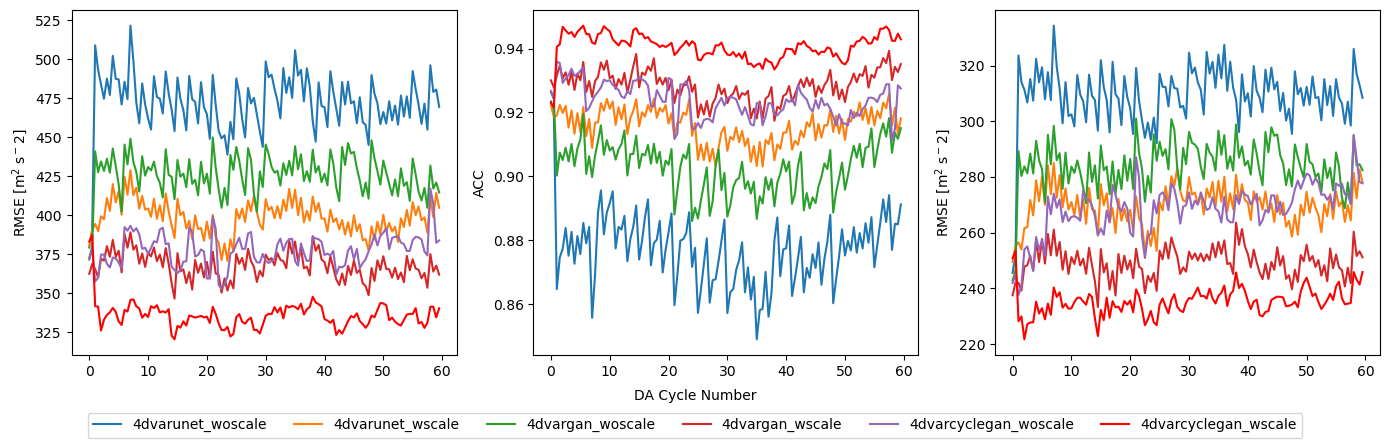

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4.5))
axes[0].plot(rmse[methods[0]], label=f"{methods[0]}")
axes[0].plot(rmse[methods[1]], label=f"{methods[1]}")
axes[0].plot(rmse[methods[2]], label=f"{methods[2]}")
axes[0].plot(rmse[methods[3]], label=f"{methods[3]}")
axes[0].plot(rmse[methods[4]], label=f"{methods[4]}")
axes[0].plot(rmse[methods[5]], label=f"{methods[5]}", color='red')

axes[1].plot(acc[methods[0]], label=f"{methods[0]}")
axes[1].plot(acc[methods[1]], label=f"{methods[1]}")
axes[1].plot(acc[methods[2]], label=f"{methods[2]}")
axes[1].plot(acc[methods[3]], label=f"{methods[3]}")
axes[1].plot(acc[methods[4]], label=f"{methods[4]}")
axes[1].plot(acc[methods[5]], label=f"{methods[5]}", color='red')

axes[2].plot(mae[methods[0]], label=f"{methods[0]}")
axes[2].plot(mae[methods[1]], label=f"{methods[1]}")
axes[2].plot(mae[methods[2]], label=f"{methods[2]}")
axes[2].plot(mae[methods[3]], label=f"{methods[3]}")
axes[2].plot(mae[methods[4]], label=f"{methods[4]}")
axes[2].plot(mae[methods[5]], label=f"{methods[5]}", color='red')

for i in range(3):
    axes[i].set_xticks(np.arange(0, 121, 20))
    axes[i].set_xticklabels([0, 10, 20, 30, 40, 50, 60])

axes[0].set_ylabel(f"RMSE [m$^2$ s$^{-2}$]")
axes[1].set_ylabel(f"ACC")
axes[2].set_ylabel(f"RMSE [m$^2$ s$^{-2}$]")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=6, loc='lower center', bbox_to_anchor=(0.5, 0))
fig.text(0.5, 0.1, f"DA Cycle Number", ha='center')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"ablation_study_{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL}.png",dpi=300, bbox_inches="tight")
plt.savefig(f"ablation_study_{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL}.pdf",dpi=300, bbox_inches="tight")

In [19]:
for k in rmse.keys():
    print(f"RMSE of {k}: ", np.mean(rmse[k][4:]))

RMSE of 4dvarunet_woscale:  473.12152
RMSE of 4dvarunet_wscale:  398.92014
RMSE of 4dvargan_woscale:  426.5553
RMSE of 4dvargan_wscale:  367.73306
RMSE of 4dvarcyclegan_woscale:  378.08557
RMSE of 4dvarcyclegan_wscale:  334.86423


In [20]:
for k in acc.keys():
    print(f"ACC of {k}: ", np.mean(acc[k][4:]))

ACC of 4dvarunet_woscale:  0.8765086
ACC of 4dvarunet_wscale:  0.9157049
ACC of 4dvargan_woscale:  0.9026217
ACC of 4dvargan_wscale:  0.92842865
ACC of 4dvarcyclegan_woscale:  0.9235073
ACC of 4dvarcyclegan_wscale:  0.94083965


In [21]:
for k in mae.keys():
    print(f"MAE of {k}: ", np.mean(mae[k][4:]))

MAE of 4dvarunet_woscale:  309.96613
MAE of 4dvarunet_wscale:  270.1554
MAE of 4dvargan_woscale:  284.8532
MAE of 4dvargan_wscale:  249.51854
MAE of 4dvarcyclegan_woscale:  269.4676
MAE of 4dvarcyclegan_wscale:  235.10536
